# Market Segmentation Analysis on McDonald data

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from collections import Counter

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

In [3]:
data = pd.read_csv(r"C:\Users\Dell\Downloads\mcdonalds.csv")

In [7]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [7]:
data.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

### STEP-7 DESCRIBING SEGMENTS

#### Demographic Segmentation

In [33]:
# Clutsers and likes
crosstab =pd.crosstab(data['cluster_num'],data['Like'])
#Reordering cols
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab 

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,87,28,30,18,12,35,14,6,8,0,0
1,5,2,7,6,6,32,41,58,66,47,44
2,58,38,36,30,30,69,48,45,17,4,0
3,2,3,0,5,10,33,49,78,138,109,99


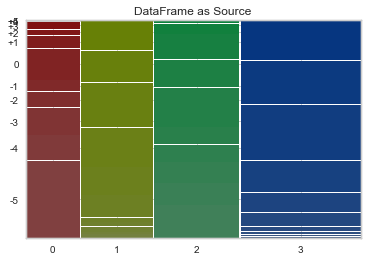

In [34]:
#MOSAIC PLOT
mosaic(crosstab.stack(),gap=0.005,labelizer=lambda k: '',title='DataFrame as Source')
plt.show()

Insights:
    
    Cluster 0 has more number of customers with rating -5
    Cluster 1 has more number of customers with rating +3
    Cluster 2 has more number of customers with rating 0
    Cluster 2 has more number of customers with rating +4

In [35]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(data['cluster_num'],data['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,102,136
1,148,166
2,217,158
3,321,205


<Figure size 3600x1440 with 0 Axes>

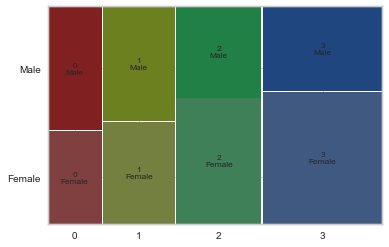

In [36]:
plt.figure(figsize = (50,20))
mosaic(crosstab_gender.stack())
plt.show()

Insights:

    Cluster 0 and 1 has more number of male customers.
    Cluster 2 and 3 has more number of female customers.

<Axes: xlabel='cluster_num', ylabel='Age'>

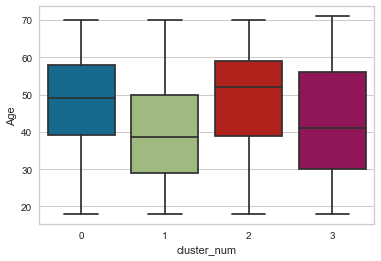

In [37]:
#box plot for age

sns.boxplot(x="cluster_num", y="Age", data=data)

Insights:
    
    More number of customers from cluster 0 are between age 40-60.
    More number of customers from cluster 1 are between age 30-40.
    More number of customers from cluster 2 are between age 40-60.
    More number of customers from cluster 3 are between age 30-55.